In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.axes._axes as axes
sns.set(font_scale=1.2)
sns.set_style("darkgrid")
from scipy import stats
color = sns.color_palette()[0]

In [27]:
rinkeby = pd.read_csv("rinkeby.csv")
rinkeby.head()

,purchaseOrderTime,purchaseOrderGas,makeOrderTime,makeOrderGas,sourceTime,sourceGas,genTime,genGas
0,25.319,196341,26.495,55216,11.417,304009,13.432,94809
1,24.028,196341,13.537,55152,34.092,303945,31.706,94745
2,26.836,196341,11.766,55216,9.582,304009,31.874,94809
3,45.600,196341,13.208,55216,11.548,304009,9.120,94809
4,29.501,196341,14.289,55216,31.488,304009,11.489,94745


In [28]:
ropsten = pd.read_csv("rinkeby.csv")
ropsten.drop(labels=[11],axis=0, inplace=True)
ropsten.head()

,purchaseOrderTime,purchaseOrderGas,makeOrderTime,makeOrderGas,sourceTime,sourceGas,genTime,genGas
0,25.319,196341,26.495,55216,11.417,304009,13.432,94809
1,24.028,196341,13.537,55152,34.092,303945,31.706,94745
2,26.836,196341,11.766,55216,9.582,304009,31.874,94809
3,45.600,196341,13.208,55216,11.548,304009,9.120,94809
4,29.501,196341,14.289,55216,31.488,304009,11.489,94745


In [29]:
ropsten = pd.read_csv("kovan.csv")
ropsten.head()

,purchaseOrderTime,purchaseOrderGas,makeOrderTime,makeOrderGas,sourceTime,sourceGas,genTime,genGas
0,18.393,203611,1.892,74410,16.856,334603,1.323,91803
1,1.877,203611,9.322,55210,4.321,304603,1.271,76803
2,1.807,203611,4.984,55186,5.809,304579,4.435,76803
3,3.360,203611,9.293,55210,9.883,304603,1.294,76803
4,5.332,203611,1.669,55210,1.723,304603,2.186,76803


In [30]:
rinkeby.describe()

,purchaseOrderTime,purchaseOrderGas,makeOrderTime,makeOrderGas,sourceTime,sourceGas,genTime,genGas
count,33.000000,33.0,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,21.819212,196341.0,16.462485,55212.121212,17.982970,304005.121212,17.763788,94801.242424
std,8.236516,0.0,7.610564,15.507574,10.337577,15.507574,9.527114,21.211775
min,8.475000,196341.0,4.152000,55152.000000,1.186000,303945.000000,0.507000,94745.000000
25%,15.291000,196341.0,10.663000,55216.000000,9.836000,304009.000000,11.489000,94809.000000
50%,21.740000,196341.0,13.746000,55216.000000,13.073000,304009.000000,15.143000,94809.000000
75%,27.108000,196341.0,22.046000,55216.000000,27.214000,304009.000000,27.557000,94809.000000
max,45.600000,196341.0,33.897000,55216.000000,38.328000,304009.000000,31.874000,94809.000000


In [31]:
def run_bootstrap(data, samples=1000, size=10):
    time_list = []
    for i in range(samples):
        s = np.random.choice(data, size=size, replace=True)
        time_list.append(np.mean(s))
    return time_list    

In [32]:
# Nets
ropsten_bs_po_time = run_bootstrap(ropsten.purchaseOrderTime)
ropsten_bs_mo_time = run_bootstrap(ropsten.makeOrderTime)
ropsten_bs_so_time = run_bootstrap(ropsten.sourceTime)
ropsten_bs_ge_time = run_bootstrap(ropsten.genTime)

Text(0.5, 0, 'Mining time in sec')

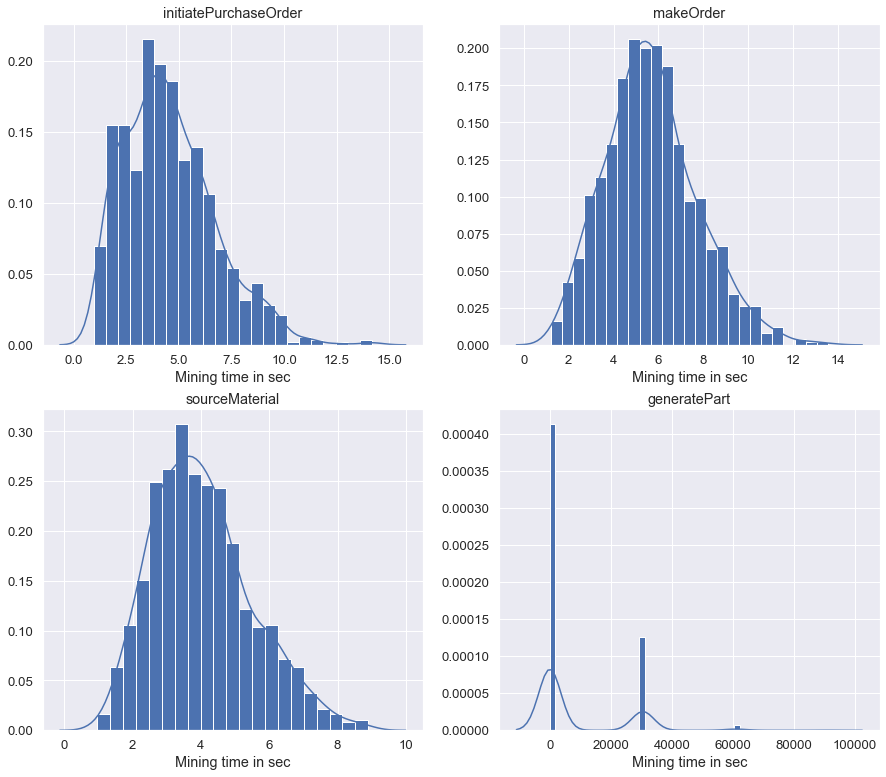

In [33]:
f, ax = plt.subplots(2,2, figsize=(15,13))
sns.distplot(ropsten_bs_po_time, ax=ax[0][0],hist_kws={'alpha':1})
ax[0][0].set_title("initiatePurchaseOrder")
ax[0][0].set_xlabel("Mining time in sec")
ax[0][0].set_label("dsd")


sns.distplot(ropsten_bs_mo_time, ax=ax[0][1],hist_kws={'alpha':1})
ax[0][1].set_title("makeOrder")
ax[0][1].set_xlabel("Mining time in sec")

sns.distplot(ropsten_bs_so_time, ax=ax[1][0],hist_kws={'alpha':1})
ax[1][0].set_title("sourceMaterial")
ax[1][0].set_xlabel("Mining time in sec")

sns.distplot(ropsten_bs_ge_time, ax=ax[1][1],hist_kws={'alpha':1})
ax[1][1].set_title("generatePart")
ax[1][1].set_xlabel("Mining time in sec")



In [34]:
ropsten_bs_po_time_s = pd.Series(ropsten_bs_po_time)
ropsten_bs_po_time_s.describe()

count    1000.000000
mean        4.547304
std         2.142334
min         0.954000
25%         2.942750
50%         4.284450
75%         5.831475
max        14.172300
dtype: float64

In [35]:
stats.norm.interval(0.95, loc=ropsten_bs_po_time_s.describe()['mean'], 
                    scale=ropsten_bs_po_time_s.describe()['std'])

(0.3484055934403152, 8.746201975056485)

In [36]:
ropsten_bs_mo_time_s = pd.Series(ropsten_bs_mo_time)
ropsten_bs_mo_time_s.describe()

count    1000.000000
mean        5.683940
std         2.045212
min         1.203600
25%         4.322825
50%         5.550750
75%         6.895425
max        13.559000
dtype: float64

In [37]:
stats.norm.interval(0.95, loc=ropsten_bs_mo_time_s.describe()['mean'], 
                    scale=ropsten_bs_mo_time_s.describe()['std'])

(1.6753989106042475, 9.69248107633515)

In [38]:
ropsten_bs_so_time_s = pd.Series(ropsten_bs_so_time)
ropsten_bs_so_time_s.describe()

count    1000.000000
mean        4.039024
std         1.454859
min         0.964900
25%         2.951175
50%         3.879750
75%         4.880925
max         8.897400
dtype: float64

In [39]:
stats.norm.interval(0.95, loc=ropsten_bs_so_time_s.describe()['mean'], 
                    scale=ropsten_bs_so_time_s.describe()['std'])

(1.187553298284385, 6.890495149465416)

In [40]:
ropsten_bs_ge_time_s = pd.Series(ropsten_bs_ge_time)
ropsten_bs_ge_time_s.describe()

count     1000.000000
mean      7984.405497
std      14530.566215
min          0.958900
25%          3.303225
50%          4.819150
75%          9.291075
max      91382.105300
dtype: float64

In [41]:
stats.norm.interval(0.95, loc=ropsten_bs_ge_time_s.describe()['mean'], 
                    scale=ropsten_bs_ge_time_s.describe()['std'])

(-20494.980959863875, 36463.79195289058)

In [42]:
ropsten.purchaseOrderGas.mean()

203611.0

In [43]:
ropsten.makeOrderGas.mean()

55741.333333333336

In [44]:
ropsten.sourceGas.mean()

305434.3333333333

In [45]:
ropsten.genGas.mean()

77203.19444444444

In [46]:
graph = pd.read_csv("gasgraph.csv")
graph.head()

,method,gas,network
0,initiatePurchaseOrder,196341,Rinkeby
1,initiatePurchaseOrder,203611,Kovan
2,initiatePurchaseOrder,203611,Ropsten
3,makeOrder,55212,Rinkeby
4,makeOrder,55756,Kovan


Text(0, 0.5, 'Mean gas consumed')

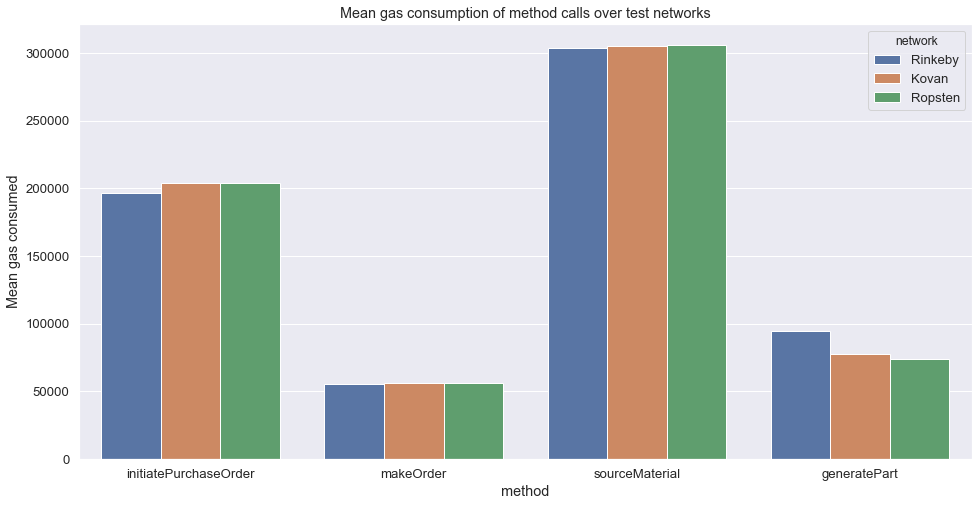

In [47]:
f, ax = plt.subplots(1,1, figsize=(16,8))
sns.barplot(x="method", y="gas", hue="network", data=graph, ax=ax)
ax.set_title("Mean gas consumption of method calls over test networks")
ax.set_ylabel("Mean gas consumed")

In [48]:
from scipy import stats

anova_res = stats.f_oneway(ropsten_bs_po_time_s,
                           ropsten_bs_mo_time_s,
                           ropsten_bs_so_time_s,
                           ropsten_bs_ge_time_s)
anova_res

F_onewayResult(statistic=301.5799490894848, pvalue=1.7433236680666733e-176)